<a href="https://colab.research.google.com/github/sahilpokhriyal/cv/blob/main/Supervised_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Intercept: [-11815.45232123]
Coefficients: [[  257.28807486]
 [ -131.11057962]
 [  332.57013224]
 [  479.36939355]
 [23820.43412267]
 [ -353.64001656]]


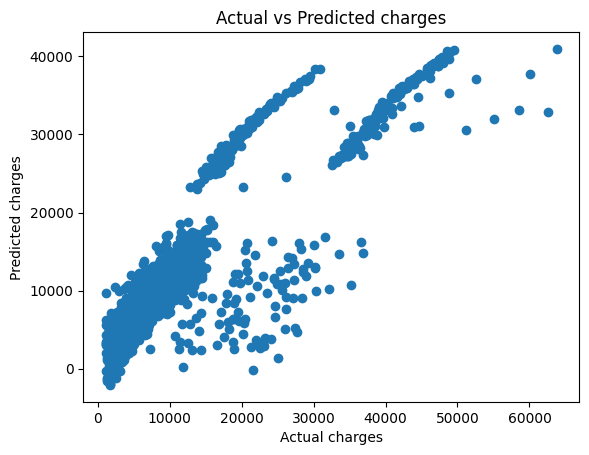

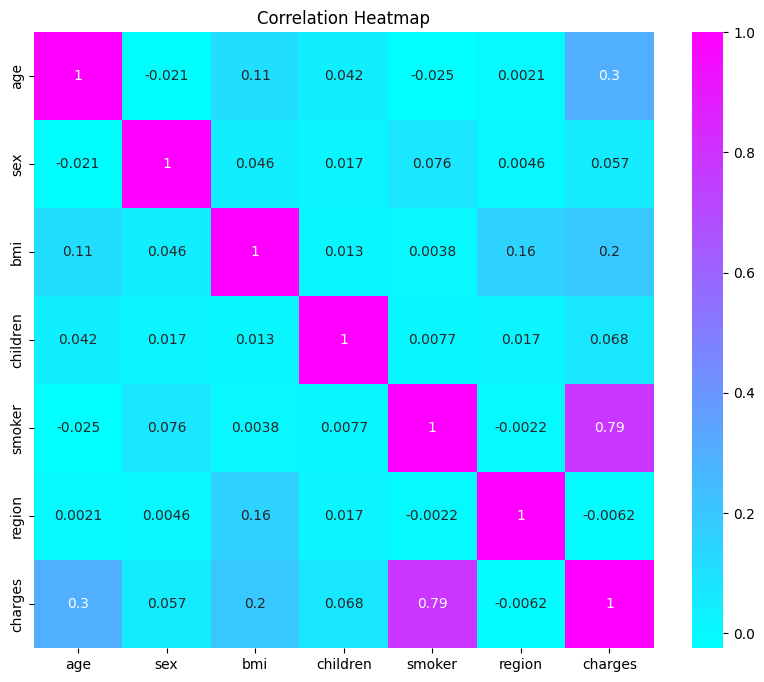

In [26]:
#Linear regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('Medical Price Dataset.csv')

# Define the linear regression function
def linear_regression(x_train, y_train):
    # Convert to NumPy arrays
    x_train = np.array(x_train, dtype=float)
    y_train = np.array(y_train, dtype=float)

    # Add intercept column to x_train
    x_train = np.c_[np.ones(x_train.shape[0]), x_train]

    # Calculate theta using normal equation
    theta = np.linalg.inv(x_train.T @ x_train) @ x_train.T @ y_train

    intercept = theta[0]
    coefficients = theta[1:]

    return intercept, coefficients

# Preprocess the data
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df['sex'] = df['sex'].cat.codes
df['smoker'] = df['smoker'].cat.codes
df['region'] = df['region'].cat.codes

# Prepare the data
x_train = df.drop(['charges'], axis=1).values
y_train = df['charges'].values.reshape(-1, 1)

# Perform linear regression
intercept, coefficients = linear_regression(x_train, y_train)

# Print the results
print('Intercept:', intercept)
print('Coefficients:', coefficients)

# Scatter plot of predicted vs actual values
y_pred = intercept + np.dot(x_train, coefficients)
plt.scatter(y_train, y_pred)
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('Actual vs Predicted charges')
plt.show()

# Heatmap of correlations
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
plt.title('Correlation Heatmap')
sns.heatmap(corr_matrix, annot=True, cmap='cool')
plt.show()
